Import the required library and set the figure size to width=10 and height=10

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify
import csv

sns.set(rc={"figure.figsize":(10, 10)}) #width=10, height=10

Show the information of the web scrapped data and store it into a data frame

In [2]:
end_clothing_product_df = pd.read_csv("product_card.csv")
print(end_clothing_product_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32542 entries, 0 to 32541
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            32542 non-null  object
 1   color           32542 non-null  object
 2   color category  32542 non-null  object
 3   price           32542 non-null  int64 
 4   department      32542 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB
None


The total number of men item from endclothing.com at the time to do scrapping

In [3]:
# Total number of Men item from endclothing.com
print(F"Total number of men's clothing item: {len(end_clothing_product_df)}")

Total number of men's clothing item: 32542


The volume of each category of each clothing. From the web scrapped data, T-Shirts is the largest volume item in men's clothing. It has 8329 T-Shirts (26%) on the website. Followed by Hoodies (2771) 9% and Sweats (2698) 8%.

department
T-Shirts                    8329
Hoodies                     2771
Sweats                      2698
Casual Jackets              2061
Shirts                      1855
Shorts                      1538
Long Sleeve Tees            1358
Sweaters                    1136
Casual Trousers             1107
Short Sleeve Shirts         1005
Cardigans                    835
Shirt Jackets                715
Sweat Pants                  678
Jeans                        605
Puffer Jackets               584
Polos                        535
Fleeces                      524
Trousers                     464
Technical & Rain Jackets     440
Gilets                       361
Cargo Pants                  345
Swimwear                     294
Bomber Jackets               264
Waistcoats                   256
Track Pants                  212
Parkas                       205
Track Tops                   199
Long Sleeve Polos            192
Jackets & Coats              185
Chinos                       158

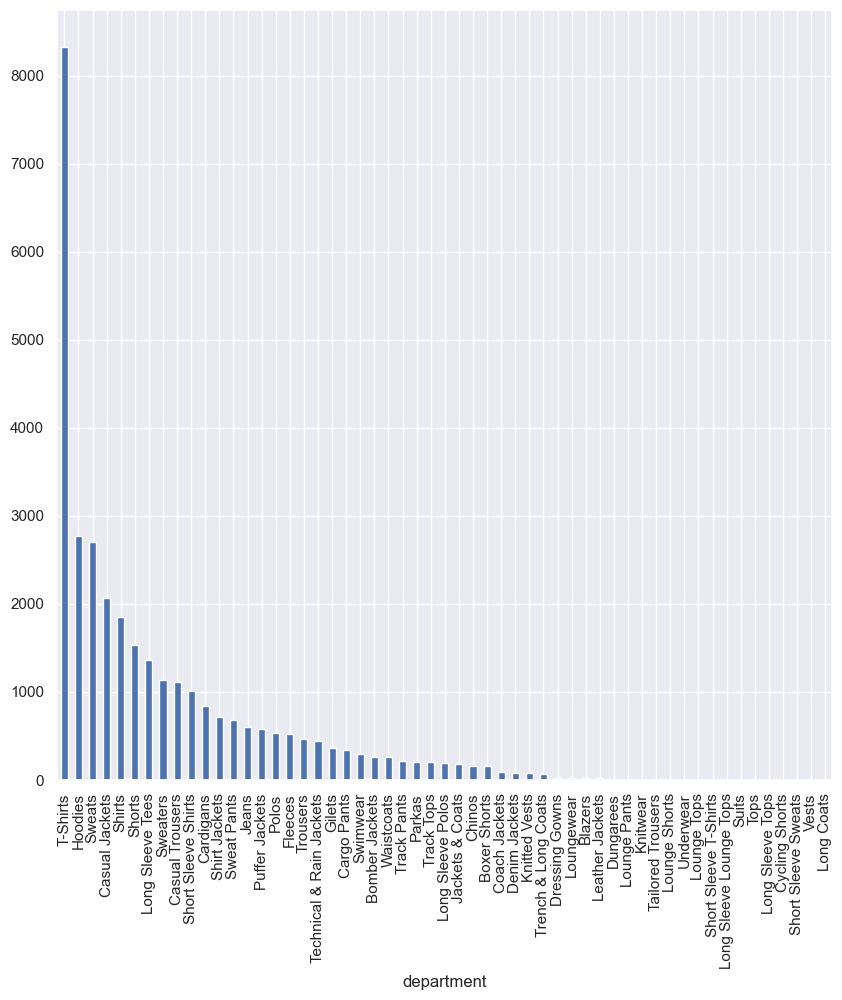

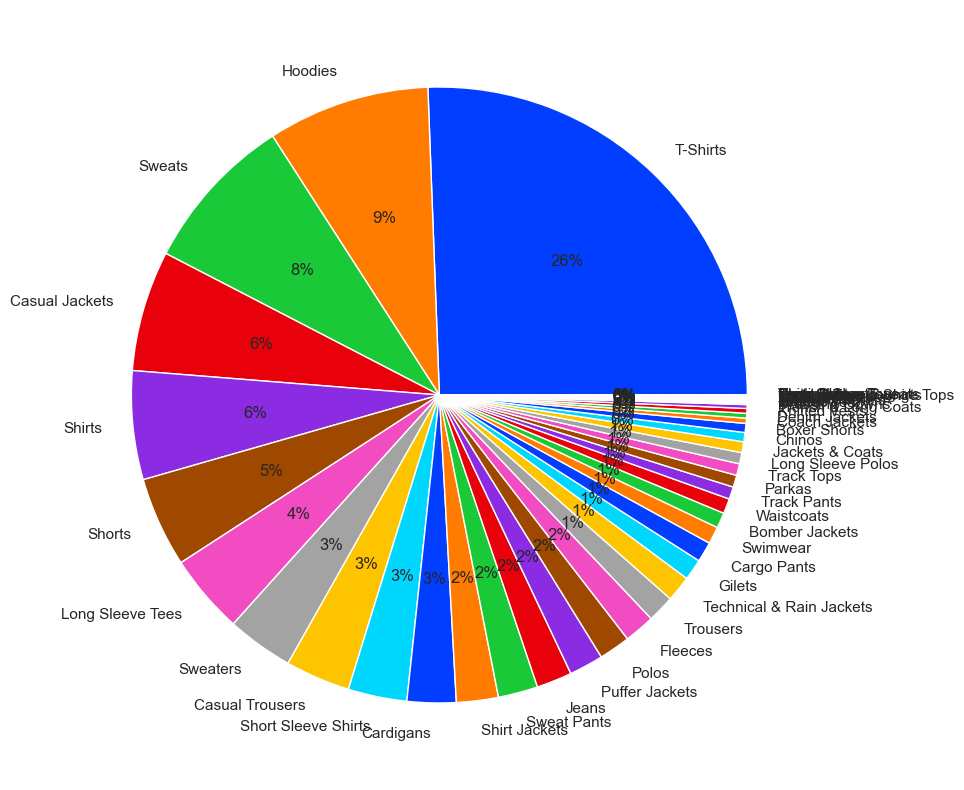

In [4]:
# Volume of each category of each clothing
count_by_dept = end_clothing_product_df.groupby("department")["department"].count()
count_by_dept = count_by_dept.sort_values(ascending=False)
count_by_dept.plot(kind="bar")
print(count_by_dept)
plt.show() 

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(count_by_dept.values, labels=list(count_by_dept.index), colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.show() 



The following treemap shows the percentage of color of cloths on the endclothing website. The most number of cloth of color is Black (9269), followed by Blue (5629), Green (3887), and white (3579). 

color category
Black       9269
Blue        5629
Green       3887
White       3579
Grey        2920
Neutrals    2444
Brown       1232
Multi        929
Red          644
Purple       499
Pink         453
Yellow       407
Orange       383
Gold         136
Burgundy      81
Silver        48
Navy           1
Thyme          1
Name: color category, dtype: int64


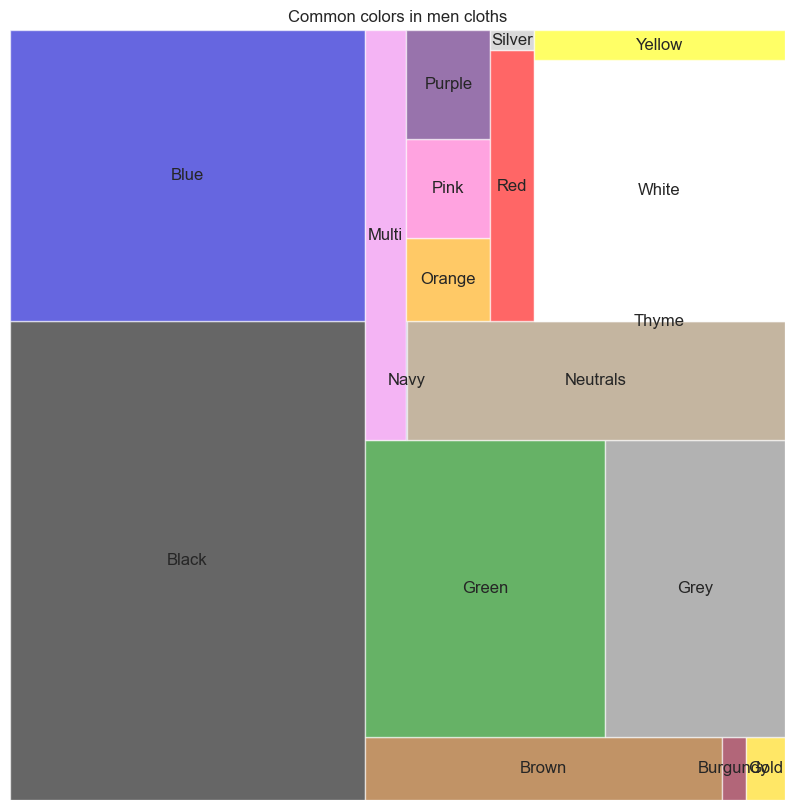

In [5]:
# Ratio of each color of each clothing
colors = ["#000000", "#0000CC", "#994C00", "#800020", "#FFD700", "#008000", "#808080", "#ee82ee", "#000080", "#9d8461", "#FFA500", "#ff66cc", 
          "#541675", "#FF0000", "#C0C0C0", "#50574c", "#FFFFFF", "#FFFF00"]

sns.set_style(style="whitegrid")
sum_of_color_cat = end_clothing_product_df.groupby("color category")["color category"].count()
print(sum_of_color_cat.sort_values(ascending=False))

squarify.plot(sizes=sum_of_color_cat.values, label=list(sum_of_color_cat.index), alpha=0.6, color=colors).set(title='Common colors in men cloths')
plt.axis('off')
plt.show()

The following box-plot (ignoring the outliner) showing the median price of each department of cloths. The department has the highest median is leather jackets, which has a median price $2339. The most scattered item is puffer jacket.

department
Leather Jackets             2339.0
Long Coats                  1705.0
Blazers                     1531.0
Puffer Jackets               907.5
Tailored Trousers            716.0
Trench & Long Coats          649.0
Suits                        581.0
Bomber Jackets               571.0
Parkas                       557.0
Jackets & Coats              389.0
Denim Jackets                360.0
Knitwear                     345.0
Technical & Rain Jackets     322.5
Dungarees                    305.0
Casual Jackets               299.0
Sweaters                     295.0
Cardigans                    273.0
Waistcoats                   267.0
Shirt Jackets                265.0
Cargo Pants                  249.0
Coach Jackets                222.5
Dressing Gowns               219.0
Jeans                        219.0
Short Sleeve Shirts          214.0
Gilets                       210.0
Casual Trousers              209.0
Trousers                     205.0
Track Tops                   205.0
Chinos   

<Axes: xlabel='price', ylabel='department'>

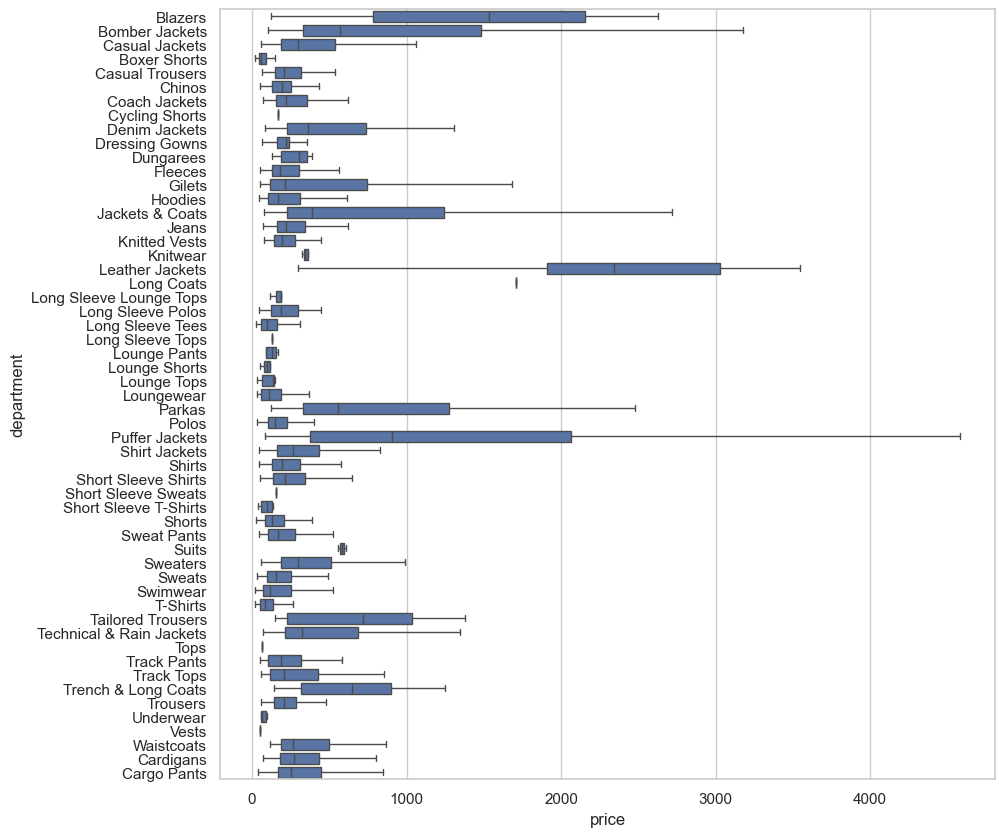

In [6]:
# Median price of each category of cloths
print(end_clothing_product_df.groupby("department")["price"].median().sort_values(ascending=False))
sns.boxplot(data = end_clothing_product_df, x='price', y='department', showfliers = False)


The following box plot shows the highest median price of color category is Black ($180). Then followed by Blue ($179) and Brown ($176.5). 

color category
Black       180.0
Blue        179.0
Brown       176.5
Burgundy    175.0
Green       174.0
Neutrals    170.0
Grey        165.0
Multi       165.0
Pink        165.0
Red         160.0
Yellow      149.0
Silver      147.0
Purple      135.0
Orange      133.0
Navy        126.0
White       112.0
Gold        100.0
Thyme        74.0
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='color category'>

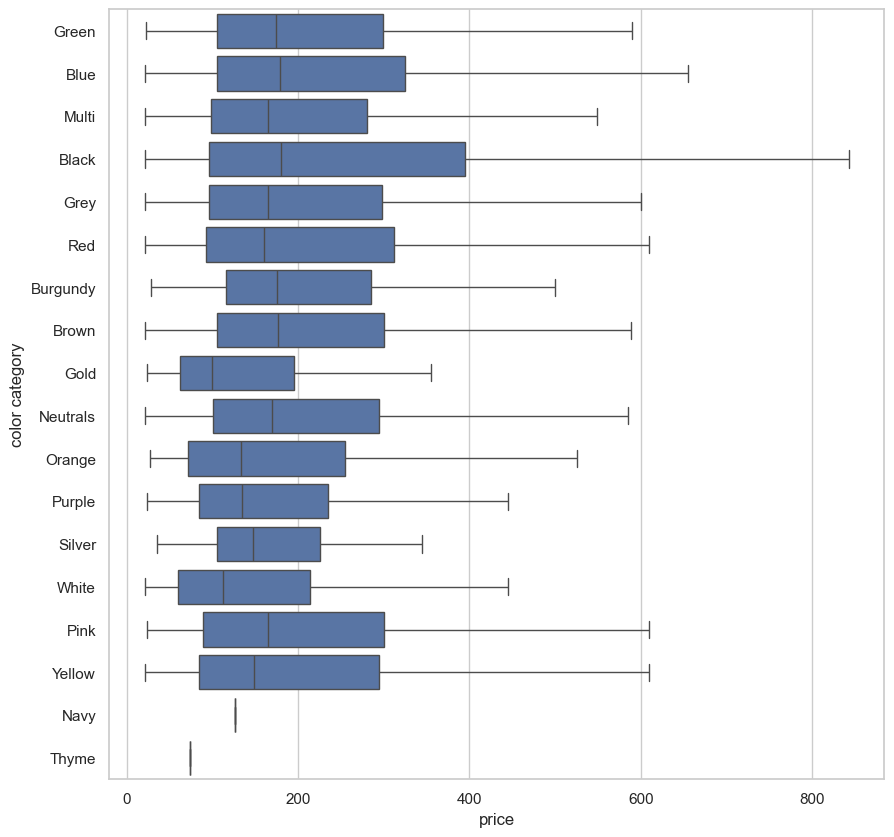

In [7]:
# Median price of each color of cloths
print(end_clothing_product_df.groupby("color category")["price"].median().sort_values(ascending=False))
sns.boxplot(data = end_clothing_product_df, x='price', y='color category', showfliers = False)

To do the further analysis, the tag "top" and "bottom" are added into the database. Those department of clothes are divided into two groups. After that, the departments which categorized as "top" contains 38 items. The department which categorized as "bottom" contains 17 items.

In [8]:
# Median price in terms of top and bottom
top = ['Blazers', 'Bomber Jackets', 'Cardigans', 'Casual Jackets', 'Coach Jackets', 'Denim Jackets', 'Dressing Gowns', 'Fleeces', 'Gilets', 'Hoodies', 'Jackets & Coats', 'Knitted Vests', 'Knitwear', 'Leather Jackets', 'Long Coats', 'Long Sleeve Lounge Tops', 'Long Sleeve Polos', 'Long Sleeve Tees', 'Long Sleeve Tops', 'Lounge Tops', 'Loungewear', 'Parkas', 'Polos', 'Puffer Jackets', 'Shirt Jackets', 'Shirts', 'Short Sleeve Shirts', 'Short Sleeve Sweats', 'Short Sleeve T-Shirts', 'Suits', 'Sweaters', 'T-Shirts', 'Technical & Rain Jackets', 'Tops', 'Track Tops', 'Trench & Long Coats', 'Vests', 'Waistcoats']
bottom = ['Boxer Shorts', 'Cargo Pants', 'Casual Trousers', 'Chinos', 'Cycling Shorts', 'Dungarees', 'Jeans', 'Lounge Pants', 'Lounge Shorts', 'Shorts', 'Sweat Pants', 'Sweats', 'Swimwear', 'Tailored Trousers', 'Track Pants', 'Trousers', 'Underwear']
print(f"No. of top category: {len(top)}")
print(f"No. of bottom category: {len(bottom)}")

end_clothing_product_df["top/bottom"] = end_clothing_product_df["department"].apply(lambda x:"top" if x in top else "bottom")

end_clothing_product_df.to_csv("end_clothing_product.csv")



No. of top category: 38
No. of bottom category: 17


In [9]:
end_clothing_product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32542 entries, 0 to 32541
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            32542 non-null  object
 1   color           32542 non-null  object
 2   color category  32542 non-null  object
 3   price           32542 non-null  int64 
 4   department      32542 non-null  object
 5   top/bottom      32542 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


The following box plot shows the median price of the "top" clothings and "bottom" clothings. The data shows that there is no significant different of price between the "top" ($165) and "bottom" ($169).

top/bottom
bottom    169.0
top       165.0
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='top/bottom'>

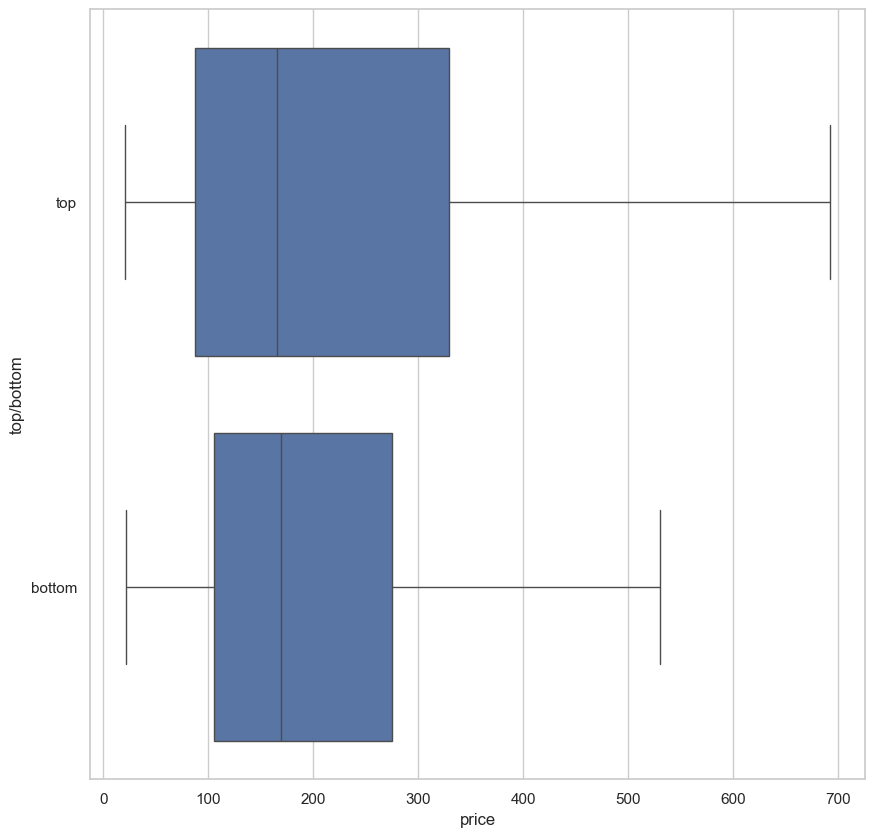

In [10]:
print(end_clothing_product_df.groupby("top/bottom")["price"].median().sort_values(ascending=False))
sns.boxplot(data = end_clothing_product_df, x='price', y='top/bottom', showfliers = False)